In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt


In [93]:
def corrected_dataframes(df):
    repeated_column_names=df[df['Product']=='Product']
    first_occurrence_index=repeated_column_names.index[0]
    df_cleaned=df.drop(range(first_occurrence_index,first_occurrence_index+len(repeated_column_names)))
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

df1=pd.read_csv("Sales_January_2019.csv")
df2=pd.read_csv("Sales_February_2019.csv")
df3=pd.read_csv("Sales_March_2019.csv")
df4=pd.read_csv("Sales_April_2019.csv")
df1=corrected_dataframes(df1)
df2=corrected_dataframes(df2)
df3=corrected_dataframes(df3)
df4=corrected_dataframes(df4)
df=pd.concat([df1,df2,df3,df4])
df.reset_index(drop=True, inplace=True)

['Roger', 'Federer', 'is', '41', 'years', 'old']


In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [22]:
df.to_csv("all_data.csv",index=False)

Data Pre-Processing: Identify missing values, data types of each column, descriptive statistics, etc

In [23]:
df.shape

(55264, 6)

Converting the columns into appropriate data types

In [92]:
df.isnull().sum()

0        False
1        False
2        False
3        False
4        False
         ...  
55259    False
55260    False
55261    False
55262    False
55263    False
Length: 54983, dtype: bool

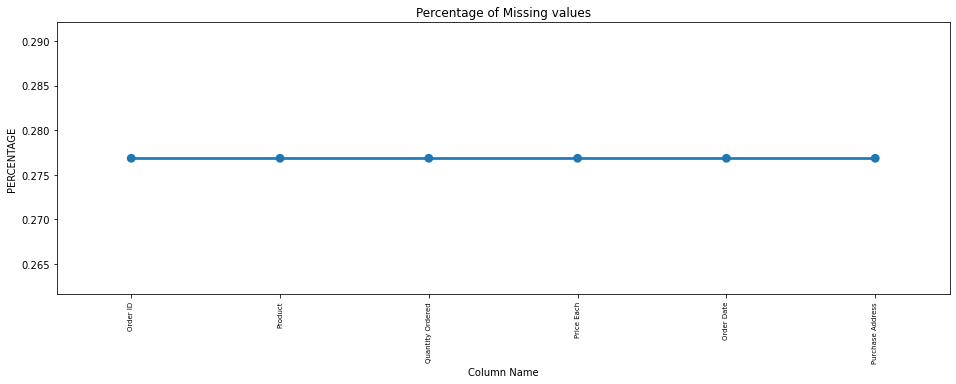

In [25]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing.rename(columns={0:"Percentage"},inplace=True)
missing.rename(columns={'index':'Column Name'},inplace=True)
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Column Name',y='Percentage',data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [26]:
missing_percentage=(df.isnull().sum())/(df.shape[0])
missing_percentage=missing_percentage*100
missing_percentage

Order ID            0.276853
Product             0.276853
Quantity Ordered    0.276853
Price Each          0.276853
Order Date          0.276853
Purchase Address    0.276853
dtype: float64

Percentage of missing values. As these values represent a very small proportion of the population, the could be deleted.

In [27]:
df[df.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1283,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
53644,NaN,NaN,NaN,NaN,NaN,NaN
53793,NaN,NaN,NaN,NaN,NaN,NaN
53941,NaN,NaN,NaN,NaN,NaN,NaN
54327,NaN,NaN,NaN,NaN,NaN,NaN


Gives us an idea of the null values

In [28]:
df.dropna(axis=0,inplace=True)

In [29]:
df.shape

(55111, 6)

We drop the null values

In [30]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

We observe no null values in any column

In [31]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [32]:
df=df[df['Order ID']!='Order ID']
df.shape

(55011, 6)

In [33]:
df['Order ID']=df['Order ID'].astype(int)
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)
df.dtypes

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\3528058331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order ID']=df['Order ID'].astype(int)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\3528058331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\3528058331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Insight 1: Trying to identify the month with the highest sales

To our assistance, let us try to capture the month and make a seperate column out of it

In [36]:
df['Month']=df['Order Date'].str[0:2]

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\2017993008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Order Date'].str[0:2]


In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [38]:
df.dtypes

Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [39]:
df['Month']=df['Month'].astype(int)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\1865381613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Month'].astype(int)


In [40]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
df.head()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\369130628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales']=df['Quantity Ordered']*df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [54]:
result=df.groupby(['Month'])['Sales'].sum()
result

Month
1    1810225.54
2    2200200.25
3    2800767.91
4    3384178.56
Name: Sales, dtype: float64

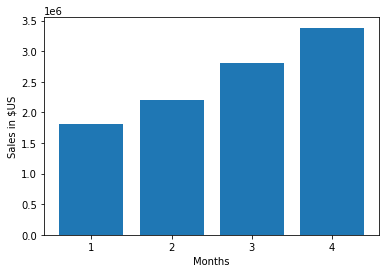

In [55]:
months=range(1,5)
plt.bar(months,result)
plt.xlabel("Months")
plt.ylabel("Sales in $US")
plt.xticks(months)
plt.show()

From the graphic above it is obvious that the month of April has the highest sales.

# Insight 2: Let's try to find which city has the highest sales

In [56]:
def splitting(rows):
    a=rows['Purchase Address'].split(",")[1]+rows['Purchase Address'].split(",")[2].split(" ")[1]
    return a

In [57]:
df['City']=df.apply(splitting,axis=1)
df.head()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\1857100734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City']=df.apply(splitting,axis=1)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,BostonMA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,PortlandOR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San FranciscoCA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los AngelesCA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,AustinTX


In [58]:
result=df.groupby('City')['Sales'].sum()
result

City
 AtlantaGA           841932.86
 AustinTX            523441.51
 BostonMA           1066863.81
 DallasTX            801042.79
 Los AngelesCA      1606134.83
 New York CityNY    1379786.34
 PortlandME          124907.07
 PortlandOR          563277.56
 San FranciscoCA    2481771.28
 SeattleWA           806214.21
Name: Sales, dtype: float64

In [59]:
city_df=pd.DataFrame(result).reset_index()

In [60]:
city_df

,City,Sales
0,AtlantaGA,841932.86
1,AustinTX,523441.51
2,BostonMA,1066863.81
3,DallasTX,801042.79
4,Los AngelesCA,1606134.83
5,New York CityNY,1379786.34
6,PortlandME,124907.07
7,PortlandOR,563277.56
8,San FranciscoCA,2481771.28
9,SeattleWA,806214.21


Text(0.5, 0, 'Sales in $US')

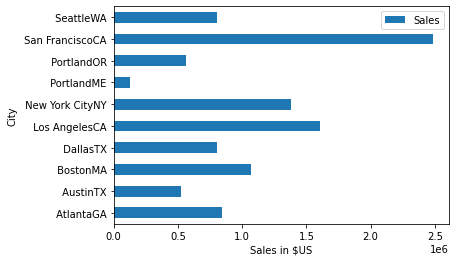

In [61]:
city_df.plot(kind='barh',x='City',y='Sales')
plt.xlabel('Sales in $US')

We see from the above plot that San Francisco has the highest electronics sales. At the Same time Portland, Maine has the lowest sales

# Insight 3: What time should advertisements be displayed to maximize customer likelihood of purchase?

In [62]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hour']=df['Order Date'].dt.hour
df['Minute']=df['Order Date'].dt.minute
df.head()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\1427592248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date']=pd.to_datetime(df['Order Date'])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\1427592248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['Order Date'].dt.hour
C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\1427592248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,BostonMA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,PortlandOR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San FranciscoCA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los AngelesCA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,AustinTX,11,59


In [63]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,BostonMA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,PortlandOR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San FranciscoCA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los AngelesCA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,AustinTX,11,59


In [66]:
hour=df.groupby(['Hour'])['Hour'].count()
hour_df=pd.DataFrame(hour)
hour_df

,Hour
Hour,
0,1115
1,697
2,399
3,245
4,235
5,406
6,762
7,1129
8,1869


In [67]:
hour_df.rename(columns={'Hour':'Count'},inplace=True)
hour_df=hour_df.reset_index()

In [68]:
hour_df

,Hour,Count
0,0,1115
1,1,697
2,2,399
3,3,245
4,4,235
5,5,406
6,6,762
7,7,1129
8,8,1869
9,9,2638


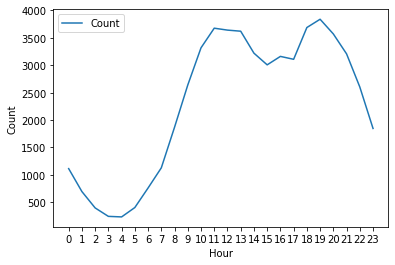

In [69]:
hour_df.plot(kind='line',x='Hour',y='Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(0,24))
plt.show()

From the graphic above, we can see a peak sales happen at approximately 11AM and 7PM. Therefore, a good time to post advertisements would be perhaps 30 mins before these peak times

# Insight 4: Figuring out which pair of products were sold together most often

In [70]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,BostonMA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,PortlandOR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San FranciscoCA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los AngelesCA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,AustinTX,11,59


In [71]:
new_df=df[df['Order ID'].duplicated(keep=False)]
new_df.head(20)
new_df['Grouped']=new_df.groupby("Order ID")['Product'].transform(lambda x:','.join(x))
new_df

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20932\109099735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped']=new_df.groupby("Order ID")['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,AustinTX,16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,AustinTX,16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los AngelesCA,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los AngelesCA,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York CityNY,11,19,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
55217,194050,USB-C Charging Cable,1,11.95,2019-04-27 00:27:00,"997 9th St, San Francisco, CA 94016",4,11.95,San FranciscoCA,0,27,"AA Batteries (4-pack),USB-C Charging Cable"
55223,194056,iPhone,1,700.00,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,700.00,San FranciscoCA,10,5,"iPhone,Lightning Charging Cable"
55224,194056,Lightning Charging Cable,1,14.95,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016",4,14.95,San FranciscoCA,10,5,"iPhone,Lightning Charging Cable"
55229,194061,iPhone,1,700.00,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301",4,700.00,AtlantaGA,20,22,"iPhone,Lightning Charging Cable"


In [72]:
new_df=new_df[['Order ID','Grouped']].drop_duplicates()
new_df

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
55172,194008,"AA Batteries (4-pack),Wired Headphones"
55186,194021,"Google Phone,Wired Headphones"
55216,194050,"AA Batteries (4-pack),USB-C Charging Cable"
55223,194056,"iPhone,Lightning Charging Cable"


In [73]:
from itertools import combinations
from collections import Counter

count=Counter()
for row in new_df['Grouped']:
    row_list=row.split(",")
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable'), 327),
 (('iPhone', 'Lightning Charging Cable'), 304),
 (('iPhone', 'Wired Headphones'), 136),
 (('Google Phone', 'Wired Headphones'), 125),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 104),
 (('iPhone', 'Apple Airpods Headphones'), 99),
 (('Google Phone', 'Bose SoundSport Headphones'), 72),
 (('Vareebadd Phone', 'Wired Headphones'), 50),
 (('USB-C Charging Cable', 'Wired Headphones'), 48),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 27)]

We see from the above result that Google Phones along with USB-C charging cables are sold most often. This sort of info can be used in tailoring advertisememnts and offers

# Insight 5: What product sold the most? Why did it sell the most?

In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,BostonMA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,PortlandOR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San FranciscoCA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los AngelesCA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,AustinTX,11,59


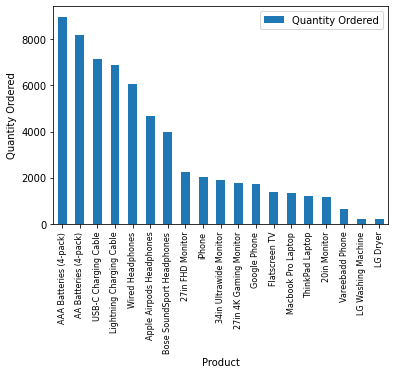

In [76]:
most_common_product=df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
most_common_product=pd.DataFrame(most_common_product)
most_common_product.reset_index(inplace=True)
most_common_product.plot(kind='bar',x='Product',y='Quantity Ordered')
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation='vertical',size=8)
plt.show()

We see from the above graph that AAA bateroes sold the most, whereas LG dryers sold the least. One possible explanation to this hypothesis could be that less expensive items sell more. To test this hypothesis, we could overlay the mean prices of each of the products

In [77]:
prices=df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\nikhi\AppData\Local\Temp\ipykernel_24868\1916759102.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_common_product['Product'],rotation='vertical',size=8)


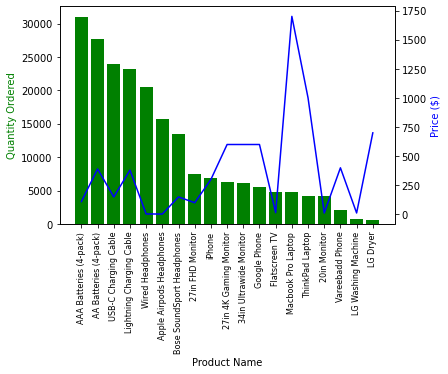

In [131]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(most_common_product['Product'],most_common_product['Quantity Ordered'],color='g')
ax2.plot(most_common_product['Product'],prices,'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered",color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(most_common_product['Product'],rotation='vertical',size=8)
plt.show()

We see that our hypothesis is met for most of the cases, i.e., when prices are low sales are high and vice-versa.

However, there are a few anomalies. For eg, Macbook Pro's, despite being significantly more expensiove that LG Dryer's sell more.
This could be attributed to the fact that a laptop computer is more widely used and something which is changed more often compared to a consumer product. A dryer is something which people would most likely end up buying once their existing dryer breaks down. On the other hand, a laptop is something people change every few years as their requirements keep changing.